In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sales = pd.read_csv("SalesData.csv")

In [5]:
sales = pd.read_csv("C:/Users/Latha/Desktop/case Study 4/SalesData.csv")
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [7]:
sales.isnull().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [20]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)

#sales1graph=sales1.plot.bar(figsize=(12,6))

reg = sales.groupby(by=['Region'])
res = reg[['Sales2015','Sales2016']].sum().add_prefix('TotalOf_')
res

,TotalOf_Sales2015,TotalOf_Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


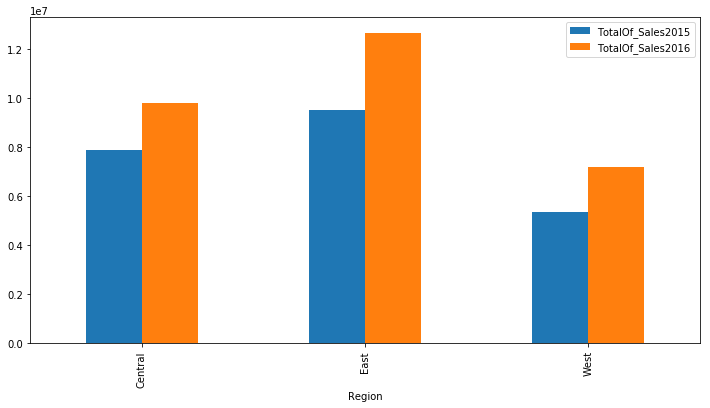

In [21]:
graph_sales=res.plot.bar(figsize=(12,6))

In [16]:
temp = sales.groupby(by=['Month'])
result = temp[['Sales2015','Sales2016']].sum().add_prefix('TotalOf_')
result

,MeanOf_Sales2015,MeanOf_Sales2016
Month,,
Apr,5385.008827,7142.708770
Aug,6029.664459,7949.281604
Dec,5904.155677,8223.801339
Feb,5706.282881,7116.641970
Jan,5513.801875,7455.421207
Jul,5998.103199,7644.932425
Jun,6032.321783,8462.971927
Mar,6183.467447,7605.535485
May,6469.957396,8402.588515


### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [132]:
sales2 = sales.groupby(['Region']).aggregate({ 'Sales2016': 'sum'})
sales2

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


ValueError: 'label' must be of length 'x'

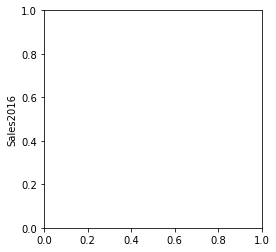

In [133]:
sales2.plot(kind='pie', 
            labels=[], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [46]:
#sales3 = sales.groupby([]).aggregate({})

#sales3graph=sales3.plot.bar(figsize=(18,6))

new = sales.groupby(by=['Region','Tier'])
result1 = new[['Sales2015','Sales2016']].sum().add_prefix('TotalOf_')
result1


TotalOf_Sales2015  TotalOf_Sales2016
Region  Tier                                      
Central High       4.798698e+06       6.026043e+06
        Low        9.434397e+05       1.132833e+06
        Med        2.068226e+06       2.632181e+06
        Out        8.136489e+04      -3.248530e+03
East    High       6.102946e+06       7.817151e+06
        Low        9.016658e+05       1.144930e+06
        Med        2.470998e+06       3.705150e+06
        Out        3.730655e+04       0.000000e+00
West    High       2.944789e+06       3.768038e+06
        Low        6.710644e+05       1.099502e+06
        Med        1.718476e+06       2.342149e+06
        Out        1.541508e+04       0.000000e+00

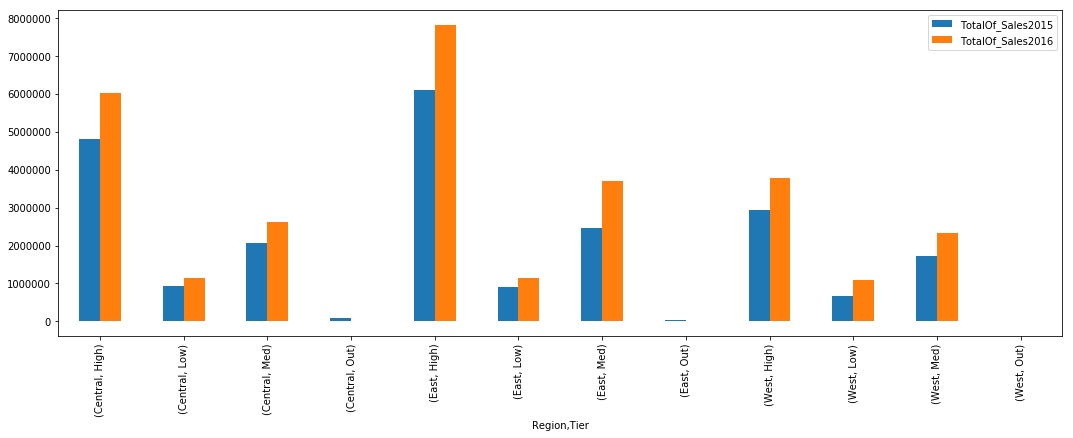

In [47]:
sales3graph=result1.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [127]:
table = pd.pivot_table(sales,index=["Region","State"], values=["Sales2015","Sales2016"])
result_comp = table.query('Region == ["East"]').sort_values(by =['Sales2015'],ascending = True)
result_comp

Sales2015     Sales2016
Region State                            
East   ME      3519.347273   8348.775000
       TN      4516.090909   6373.582727
       SC      4765.611154   8911.810000
       CT      5634.365429   9242.923143
       NH      5684.140833   6029.896250
       RI      5789.325926   6016.838889
       NJ      5981.830920   8991.829770
       MA      5989.696429   9815.663571
       FL      6385.238462   9647.047231
       VA      6502.532778   9360.436032
       GA      6747.984752   9375.443267
       PA      7406.535425   8436.976321
       NC      7931.298405   9880.496933
       DC      8335.536538   9900.834231
       MD      9091.535517  12931.186034
       NY     10270.327768  10137.713095

In [128]:
result_comp.min()

Sales2015    3519.347273
Sales2016    6016.838889
dtype: float64

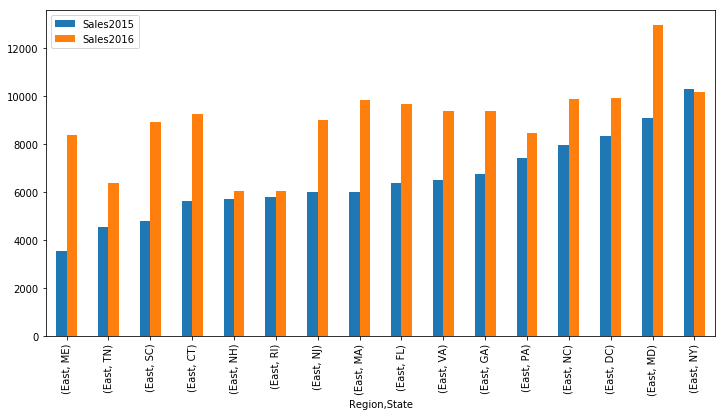

In [129]:
East_Graph=result_comp.plot.bar(figsize=(12,6))

In [48]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
AccountId             3709 non-null int64
AccountName           3709 non-null object
Region                3709 non-null object
Division              3709 non-null object
City                  3709 non-null object
State                 3709 non-null object
Tier                  3709 non-null object
Month                 3709 non-null object
Sales2015             3709 non-null float64
Sales2016             3709 non-null float64
Units2015             3709 non-null float64
Units2016             3709 non-null float64
TargetAchevied2015    3709 non-null float64
TargetAchevied2016    3709 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [53]:
table1 = pd.pivot_table(sales,index=["Division","Tier"], values=["Units2015","Units2016"])
result_comp1 = table1.query('Tier == ["High"]').sort_values(by =['Units2015'],ascending = True)
result_comp1

,,Units2015,Units2016
Division,Tier,,
TORNADO VALLEY,High,1.711108,2.413339
CHARGERS,High,1.766666,2.349999
STAMPEDE,High,1.868931,2.396440
RACEWAY,High,1.877198,3.126316
MUDDY WATERS,High,2.008888,2.820005
HAILSTORM,High,2.019718,2.655917
DIAMONDBACK,High,2.072073,2.387388
WOLVERINE,High,2.103452,2.465517
ORION,High,2.197917,3.450000


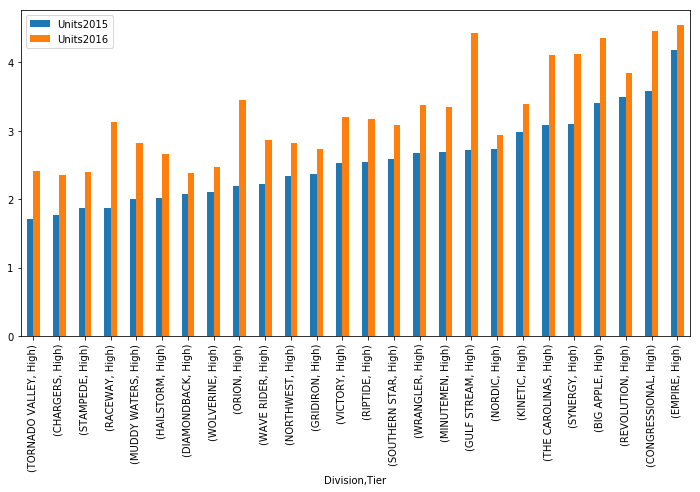

In [54]:
result_comp1=result_comp1.plot.bar(figsize=(12,6))

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [82]:
sales.head(12)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,QTR
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,NONE
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,NONE
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,NONE
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,NONE
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,NONE
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45,NONE
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99,NONE
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46,NONE
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02,NONE
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54,NONE


In [106]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,QTR
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


In [107]:
from numpy import where as IF

            
sales['Qtr'] = IF((sales['Month']=='Jan') | (sales['Month']=='Feb') | (sales['Month']=='Mar'),'Q1',
            IF((sales['Month']=='Apr') | (sales['Month']=='May') | (sales['Month']=='Jun'),'Q2',
            IF((sales['Month']=='Jul') | (sales['Month']=='Aug') | (sales['Month']=='Sep'),'Q3',
            IF((sales['Month']=='Oct') | (sales['Month']=='Nov') | (sales['Month']=='Dec'),'Q4','Q5'))))

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


In [109]:
new1 = sales.groupby(by=['Qtr'])
result2 = new1[['Sales2015','Sales2016']].sum().add_prefix('TotalOf_')
result2

,TotalOf_Sales2015,TotalOf_Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


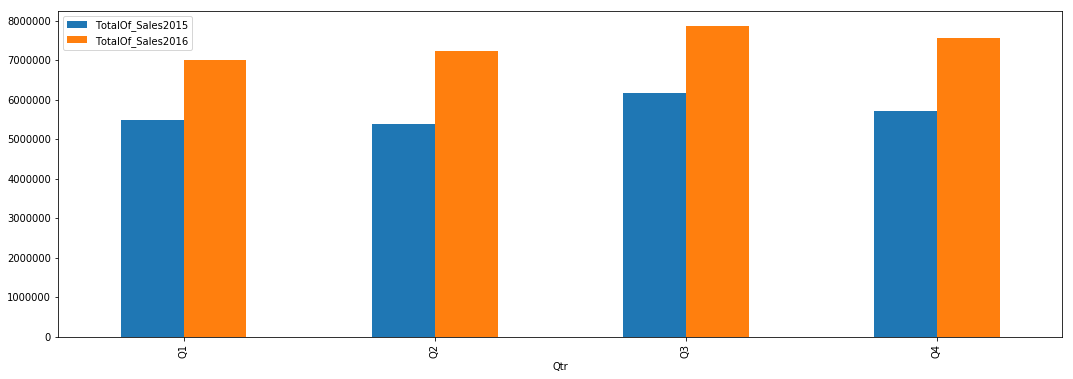

In [110]:
sales_graph=result2.plot.bar(figsize=(18,6))

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [118]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(['Tier'])


In [119]:
Res = sales8[['Sales2015','Sales2016']].sum()



In [120]:

sales8 = Res.round(decimals=0)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

Tier,High,Low,Med
Sales2015,13846434.0,2516170.0,6257700.0
Sales2016,17611232.0,3377265.0,8679480.0


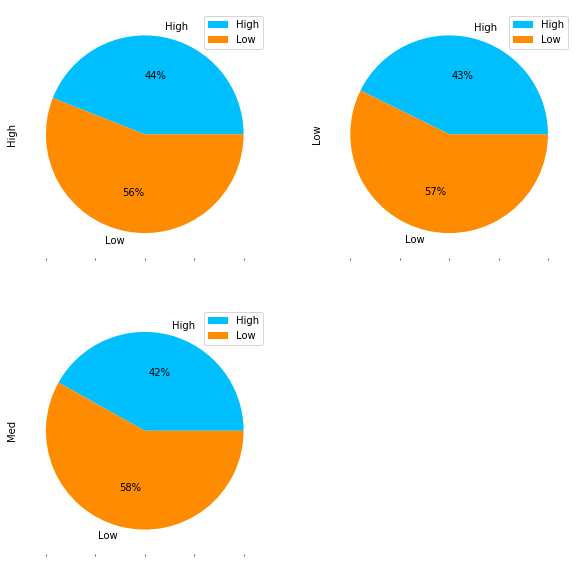

In [121]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()